<a href="https://www.kaggle.com/rahulkasaudhan/perceptron-implementation?scriptVersionId=88671345" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Single Layer Perceptron

**Note: Same working for Logistic Regression also**

ANN
1. Aperceptron is a single layer neural network
2. It acts as a Linear classifier, Binary Classifier 
3. Loss Function : Binary Cross Entropy (-ve of Log Likelihood)
4. Optimisation : Gradient Descent Stochastic Gradient Descent

Learning Goals
1. How to implement perceptron?
2. Understanding Vectorization , writing efficient code without using for loop!
3. What is the meaning of Linear Classifier

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs



## Generating Data 

In [2]:
#X,Y=make_blobs?

In [3]:
X,Y= make_blobs(n_samples=500, centers=2, n_features=2,random_state=11)

In [4]:
print(X.shape,Y.shape)

(500, 2) (500,)


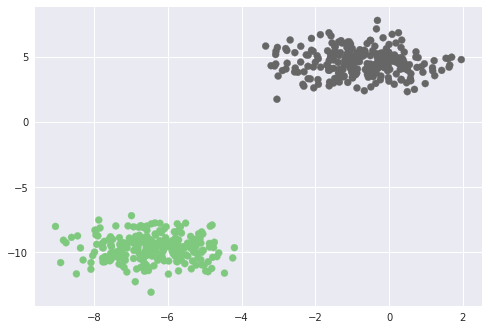

In [5]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

# Model and Helper Func

In [6]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [7]:
sigmoid(5)

0.9933071490757153

In [8]:
z=np.array([1,2,3,4,5])
print(sigmoid(z))

[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]


## Implement Perceptron Learning Algorithm
- Learn the weights
- Reduce the Loss
- Make the predictions

Y_ is Y hat

In [9]:
def predict(X,weights):
    """weights are W1,W2,W3,.....,Wn"""
    """ X->mat of m*n weights->mat n*1 resulting matrix X dot Y=m*1 """
    z=np.dot(X,weights)
    predictions=sigmoid(z)
    return predictions
    

In [10]:
def loss(X,Y,weights):
    """Binary Cross Entropy"""
    Y_=predict(X,weights)
    cost= np.mean(-Y*np.log(Y_)-(1-Y)*np.log(1-Y_))
    return cost
    

In [11]:
def update(X,Y,weights,learning_rate):
    """X-> m*n  mat Y_ and Y->m*1 mat => (Y_-Y)->m*1 mat transpose(X) -> n*m mat hence trans(X)dot(Y_-Y) ->n*1 mat"""
    Y_=predict(X,weights)
    dw=np.dot(X.T,Y_-Y)
    m=X.shape[0]
    weights=weights-learning_rate*dw/(float(m))
    return weights

In [12]:
def train(X,Y,learning_rate=0.8,maxEpochs=1000):
    #modify the input to handle the bias term
    m=X.shape[0]
    ones=np.ones((m,1))
    #print(ones)
    X=np.hstack((ones,X)) #combine ones matrix (m*1) and X matrix m*n final matrix will be m*(n+1)
    #init weights 
    weights=np.zeros(X.shape[1]) #X.shape[1]=n+1 entries now
    
    #iterate over all epochs and update
    for epoch in range(maxEpochs):
        weights=update(X,Y,weights,learning_rate)
        #after 10 epochs print progress
        if epoch%10==0:
            l=loss(X,Y,weights)
            print("Epoch %d loss %.4f"%(epoch,l))
            
    return weights
    

In [13]:
weights=train(X,Y)

Epoch 0 loss 0.0005
Epoch 10 loss 0.0004
Epoch 20 loss 0.0004
Epoch 30 loss 0.0004
Epoch 40 loss 0.0004
Epoch 50 loss 0.0004
Epoch 60 loss 0.0004
Epoch 70 loss 0.0004
Epoch 80 loss 0.0003
Epoch 90 loss 0.0003
Epoch 100 loss 0.0003
Epoch 110 loss 0.0003
Epoch 120 loss 0.0003
Epoch 130 loss 0.0003
Epoch 140 loss 0.0003
Epoch 150 loss 0.0003
Epoch 160 loss 0.0003
Epoch 170 loss 0.0003
Epoch 180 loss 0.0003
Epoch 190 loss 0.0003
Epoch 200 loss 0.0002
Epoch 210 loss 0.0002
Epoch 220 loss 0.0002
Epoch 230 loss 0.0002
Epoch 240 loss 0.0002
Epoch 250 loss 0.0002
Epoch 260 loss 0.0002
Epoch 270 loss 0.0002
Epoch 280 loss 0.0002
Epoch 290 loss 0.0002
Epoch 300 loss 0.0002
Epoch 310 loss 0.0002
Epoch 320 loss 0.0002
Epoch 330 loss 0.0002
Epoch 340 loss 0.0002
Epoch 350 loss 0.0002
Epoch 360 loss 0.0002
Epoch 370 loss 0.0002
Epoch 380 loss 0.0002
Epoch 390 loss 0.0002
Epoch 400 loss 0.0002
Epoch 410 loss 0.0002
Epoch 420 loss 0.0002
Epoch 430 loss 0.0002
Epoch 440 loss 0.0002
Epoch 450 loss 0.0002

We can try with different no of epochs and learning rate and see that there is continously decrease in loss and going towards minima

# Part-2  Perceptron Implementation
- Make predictions
- Visualise Descision Surface
- Linear vs Non Linear Classification

In [14]:
def getPredictions(X_test,weights,label=True):
    #If in X_test bias term not added that is m*n mat we need to make it m*(n+1) so to multiply by weight (n+1)*1 mat
    if X_test.shape[1]!=weights.shape[0]:
        ones=np.ones((X_test.shape[0],1))
        X_test=np.hstack((ones,X_test))
    
    probs=predict(X_test,weights)
    
    if not label:
        return probs
    else:
        labels=np.zeros(probs.shape)
        labels[probs>=0.5]=1 
        return labels
        

In [15]:
print(weights)

[0.137576   0.74743092 3.12107667]


In [16]:
#generate 10 datapoints from -8 to 10
x1=np.linspace(-12,2,10)
x2=-(weights[0]+weights[1]*x1)/weights[2]                          #W0 + W1X1 + W2X2 =0  =>  X2=-(W0 + W1X1) / W2

In [17]:
print(x1)
print(x2)

[-12.         -10.44444444  -8.88888889  -7.33333333  -5.77777778
  -4.22222222  -2.66666667  -1.11111111   0.44444444   2.        ]
[ 2.82966296  2.45714077  2.08461858  1.71209638  1.33957419  0.967052
  0.59452981  0.22200762 -0.15051457 -0.52303676]


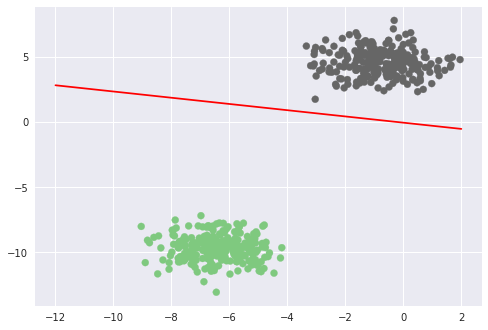

In [18]:
plt.scatter(X[:,0],X[:,1] ,c=Y , cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [19]:
Y_=getPredictions(X,weights,label=True)

In [20]:
print(Y_)
Y==Y_

[1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [21]:
def trainingAcc(Y,Y_):
    return np.sum(Y_==Y)/Y.shape[0]

In [22]:
print(trainingAcc(Y,Y_))

1.0


**If we use Non linear Dataset we will not get this type of simple descision boundary for that we have to use multilayer perceptron for complex boundary**
To generate Non linear dataset use make_moons instead of make_blob 